We will develop a very simple multilayer perception with a single hidden layer to demonstrate the backprop. 
We will use minibatch stochastic gradient descent. ReLU + Cross-entropy (Negative log likelihood) + weight decay.
In this module, we will use libraries to demonstrate the idea as we have already built lots of model from scratch.

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42) # non-linear dataset

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long) #long for class labels
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [6]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) # W1 and b1
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim) # W2 and b2

    def forward(self, x):
        out = self.fc1(x) # W1*x + b1
        out = self.relu(out) # max(0, out)
        out = self.fc2(out) # W2*out + b2
        return out
    
model = SimpleMLP(input_dim=2, hidden_dim=10, output_dim=2)

In [7]:
criterion = nn.CrossEntropyLoss() # negative log likelihood which combines softmax and log
optimizer = optim.SGD(model.parameters(), lr=0.05, weight_decay=1e-4) # weight decay is L2 regularization

Epoch  10 | Loss: 0.1286 | Test Acc: 0.965
Epoch  20 | Loss: 0.1277 | Test Acc: 0.965
Epoch  30 | Loss: 0.1268 | Test Acc: 0.965
Epoch  40 | Loss: 0.1259 | Test Acc: 0.965
Epoch  50 | Loss: 0.1250 | Test Acc: 0.965
Epoch  60 | Loss: 0.1241 | Test Acc: 0.965
Epoch  70 | Loss: 0.1232 | Test Acc: 0.970
Epoch  80 | Loss: 0.1223 | Test Acc: 0.970
Epoch  90 | Loss: 0.1214 | Test Acc: 0.975
Epoch 100 | Loss: 0.1205 | Test Acc: 0.975
Epoch 110 | Loss: 0.1197 | Test Acc: 0.975
Epoch 120 | Loss: 0.1188 | Test Acc: 0.975
Epoch 130 | Loss: 0.1179 | Test Acc: 0.975
Epoch 140 | Loss: 0.1171 | Test Acc: 0.975
Epoch 150 | Loss: 0.1162 | Test Acc: 0.975
Epoch 160 | Loss: 0.1154 | Test Acc: 0.975
Epoch 170 | Loss: 0.1145 | Test Acc: 0.975
Epoch 180 | Loss: 0.1137 | Test Acc: 0.975
Epoch 190 | Loss: 0.1129 | Test Acc: 0.975
Epoch 200 | Loss: 0.1121 | Test Acc: 0.975
Epoch 210 | Loss: 0.1113 | Test Acc: 0.975
Epoch 220 | Loss: 0.1105 | Test Acc: 0.975
Epoch 230 | Loss: 0.1097 | Test Acc: 0.975
Epoch 240 |

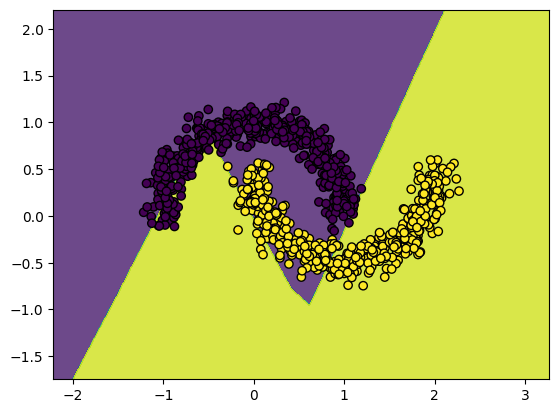

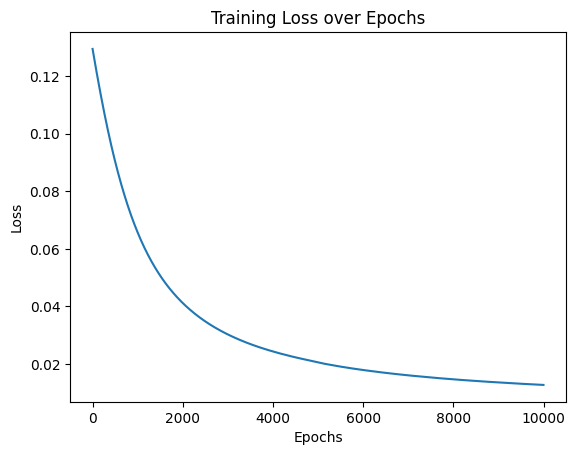

In [11]:
epochs = 10000
loss_list = []

for epoch in range(epochs):
    # forward pass
    logits = model(X_train)
    loss = criterion(logits, y_train)

    # backward pass and optimization
    optimizer.zero_grad() # clear previous gradients
    loss.backward() # compute gradients
    optimizer.step() # update weights

    loss_list.append(loss.item())

    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            preds = model(X_test).argmax(dim=1)
            acc = (preds == y_test).float().mean()
        print(f"Epoch {epoch+1:3d} | Loss: {loss.item():.4f} | Test Acc: {acc:.3f}")


# Visualization
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid_tensor).argmax(dim=1).numpy()
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, X, y)

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()
